## Problem Statement

To develop a Claim Propensity Model to predict whether a policyholder is likely to file a claim. The model will classify customers into two categories:
0: Unlikely to file a claim
1: Likely to file a claim
This model will also provide probability score for a customer to likely to file a claim, through which the overall efficiency in fixing the premium can be improved.

## Data

In [37]:

# **Demographic Variables:**

# * **Age:**  Older drivers tend to have fewer accidents, but this can vary by region and driving history.
# * **Gender:**  Historically, males have had higher claim rates, but this is becoming less pronounced.
# * **Marital Status:**  Married individuals might have different risk profiles.
# * **Occupation:**  Certain occupations might involve higher risk of accidents.
# * **Driving Experience:**  Years of driving experience can be a strong predictor.
# * **Location:**  Urban vs. rural, specific city/region, traffic density.
# * **Education:**  Higher education levels might correlate with safer driving habits.

# **Vehicle-Related Variables:**

# * **Vehicle Type:**  Sports cars, SUVs, etc. have different risk profiles.
# * **Vehicle Age:**  Older vehicles might have higher maintenance issues.
# * **Vehicle Value:**  More expensive vehicles might be associated with higher claim amounts.
# * **Engine Size:**  Larger engines might correlate with higher speeds and risk.
# * **Vehicle Modifications:**  Aftermarket modifications can impact safety and risk.
# * **Vehicle Usage:**  Daily driver, weekend car, etc.
# * **Parking Location:**  Street parking, garage, etc.

# **Driving History:**

# * **Number of Previous Claims:**  A key predictor of future claims.
# * **Claim Severity:**  The cost of previous claims.
# * **Traffic Violations:**  Speeding tickets, DUI, etc.
# * **Accidents:**  Past accidents, even without claims.
# * **Driving Habits:**  Commuting vs. recreational driving.

# **Policy-Related Variables:**

# * **Policy Type:**  Comprehensive, collision, etc.
# * **Coverage Limits:**  Higher limits might indicate a higher risk tolerance.
# * **Deductible:**  Higher deductibles might encourage safer driving.
# * **Policy Duration:**  Longer policy durations might indicate lower risk.
# * **Insurance History:**  Previous insurers, policy changes.


## Import Libraries

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [53]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 31.7 MB/s eta 0:00:00:00:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 94.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mkl-fft 1.3.10 requires mkl, which is not installed.
hdijupyterutils 0.21.0 requires pandas<2.0.0,>=0.17.1, but you have pandas 2.2.2 which is incompatible.
sparkmagic 0.21.0 requires pandas<2.0.0,>=0.17.1, but you have pandas 2.2.2 which is incompatible.


In [65]:
pip install -U imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 10.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [66]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE

## Data Load

In [18]:
# Load the dataset
data = pd.read_csv('data_claim_d2.csv')

## Data Description

In [20]:
data.columns

Index(['Age', 'Gender', 'Marital_Status', 'Occupation', 'Driving_Experience',
       'Location', 'Education', 'Vehicle_Type', 'Vehicle_Age', 'Vehicle_Value',
       'Engine_Size', 'Vehicle_Modifications', 'Num_Previous_Claims',
       'Claim_Severity', 'Traffic_Violations', 'Accidents', 'Policy_Type',
       'Coverage_Limits', 'Deductible', 'Policy_Duration', 'Driving_Habits',
       'Vehicle_Usage', 'Parking_Location', 'Insurance_History',
       'Claim_Propensity', 'Driving_Experience_Bin'],
      dtype='object')

In [21]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     1000 non-null   int64 
 1   Gender                  1000 non-null   object
 2   Marital_Status          1000 non-null   object
 3   Occupation              1000 non-null   object
 4   Driving_Experience      1000 non-null   int64 
 5   Location                1000 non-null   object
 6   Education               1000 non-null   object
 7   Vehicle_Type            1000 non-null   object
 8   Vehicle_Age             1000 non-null   int64 
 9   Vehicle_Value           1000 non-null   int64 
 10  Engine_Size             1000 non-null   int64 
 11  Vehicle_Modifications   745 non-null    object
 12  Num_Previous_Claims     1000 non-null   int64 
 13  Claim_Severity          1000 non-null   int64 
 14  Traffic_Violations      1000 non-null   int64 
 15  Accid

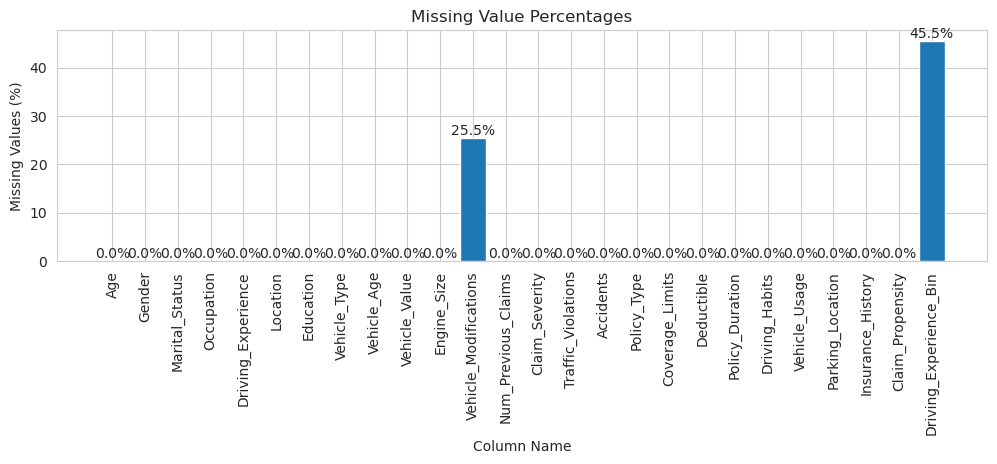

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate missing value percentages
missing_percentages = (data.isnull().sum() / len(data)) * 100

plt.figure(figsize=(12, 3))
plt.bar(missing_percentages.index, missing_percentages.values)
plt.xlabel('Column Name')
plt.ylabel('Missing Values (%)')
plt.title('Missing Value Percentages')
plt.xticks(rotation=90)

for i, (index, value) in enumerate(missing_percentages.items()):
    plt.text(i, value, f'{value:.1f}%', ha='center', va='bottom')

plt.show()

## EDA

/tmp/ipykernel_28941/3610636637.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Claim_Propensity', data=data, palette="Set2")


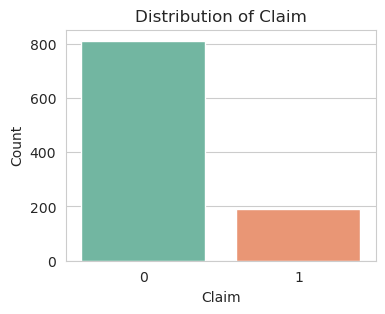

In [39]:

import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")

plt.figure(figsize=(4, 3))  # Set the figure size
sns.countplot(x='Claim_Propensity', data=data, palette="Set2")
plt.title("Distribution of Claim")
plt.xlabel("Claim")
plt.ylabel("Count")
plt.show()

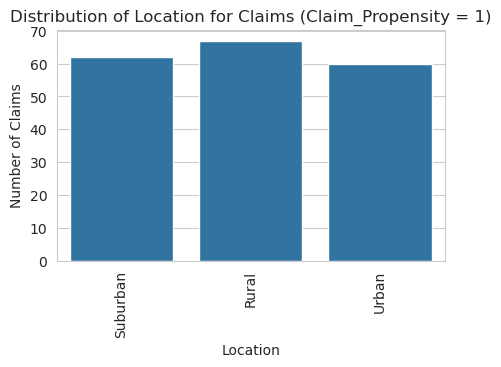

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

claim_data = data[data['Claim_Propensity'] == 1]

# Group data by 'Location' and count the number of claims in each location
location_counts = data['Location'].value_counts()

# Create a bar graph
plt.figure(figsize=(5, 3))
sns.countplot(x='Location', data=claim_data)
plt.title('Distribution of Location for Claims (Claim_Propensity = 1)')
plt.xlabel('Location')
plt.ylabel('Number of Claims')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


/tmp/ipykernel_28941/1723411783.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = data.groupby(['Driving_Experience_Bin', 'Claim_Propensity']).size().unstack(fill_value=0)


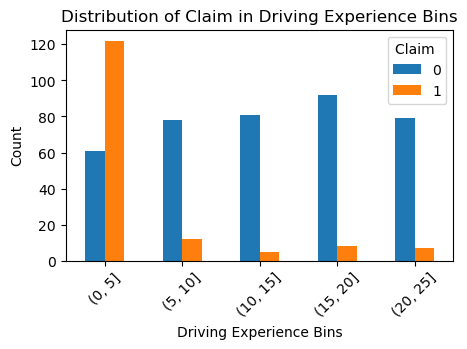

Inference:
The bar graph shows the distribution of Claim_Propensity (0 or 1) within different bins of Driving_Experience.  We can observe if there's a correlation between driving experience and claim propensity. For example, if we see a higher proportion of '1' (claim propensity) in lower experience bins, it could suggest that newer drivers tend to have more claims.


In [3]:

# Create bins for Driving_Experience
bins = [0, 5, 10, 15, 20, 25]
data['Driving_Experience_Bin'] = pd.cut(data['Driving_Experience'], bins=bins)

# Group by Driving_Experience_Bin and Claim_Propensity, then count the occurrences
bin_counts = data.groupby(['Driving_Experience_Bin', 'Claim_Propensity']).size().unstack(fill_value=0)

# Plot the distribution
bin_counts.plot(kind='bar', figsize=(5, 3))
plt.title('Distribution of Claim in Driving Experience Bins')
plt.xlabel('Driving Experience Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Claim ')
plt.show()

print("Inference:")
print("The bar graph shows the distribution of Claim_Propensity (0 or 1) within different bins of Driving_Experience.  We can observe if there's a correlation between driving experience and claim propensity. For example, if we see a higher proportion of '1' (claim propensity) in lower experience bins, it could suggest that newer drivers tend to have more claims.")


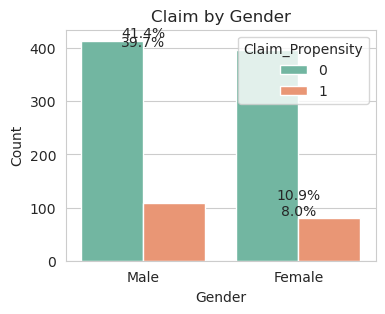

In [50]:

# Set the style for the plot
sns.set_style("whitegrid")

# Create a countplot
plt.figure(figsize=(4, 3))  # Set the figure size
sns.countplot(x='Gender', hue='Claim_Propensity', data=data, palette="Set2")
plt.title("Claim by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

# Calculate percentages
total = len(data)
no_claim_male = data[(data['Claim_Propensity'] == 0) & (data['Gender'] == 'Male')].shape[0]
claim_male = data[(data['Claim_Propensity'] == 1) & (data['Gender'] == 'Male')].shape[0]
no_claim_female = data[(data['Claim_Propensity'] == 0) & (data['Gender'] == 'Female')].shape[0]
claim_female = data[(data['Claim_Propensity'] == 1) & (data['Gender'] == 'Female')].shape[0]

no_claim_male_percent = (no_claim_male / total) * 100
claim_male_percent = (claim_male / total) * 100
no_claim_female_percent = (no_claim_female / total) * 100
claim_female_percent = (claim_female / total) * 100

# Add percentage annotations
plt.text(0, no_claim_male, f'{no_claim_male_percent:.1f}%', ha='center', va='bottom')
plt.text(1, claim_male, f'{claim_male_percent:.1f}%', ha='center', va='bottom')
plt.text(0, no_claim_female, f'{no_claim_female_percent:.1f}%', ha='center', va='bottom')
plt.text(1, claim_female, f'{claim_female_percent:.1f}%', ha='center', va='bottom')

plt.show()


/tmp/ipykernel_28941/1074438897.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bin_counts = data.groupby(['Age_Bin', 'Claim_Propensity']).size().unstack(fill_value=0)


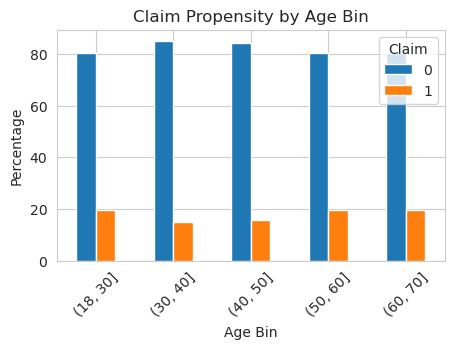

In [51]:

# Create age bins
bins = [18, 30, 40, 50, 60, 70]
data['Age_Bin'] = pd.cut(data['Age'], bins=bins)

# Group by Age_Bin and Claim_Propensity, then count the occurrences
age_bin_counts = data.groupby(['Age_Bin', 'Claim_Propensity']).size().unstack(fill_value=0)

# Calculate percentages
total_count = age_bin_counts.sum(axis=1)
age_bin_percentages = age_bin_counts.div(total_count, axis=0) * 100

# Plot the distribution
age_bin_percentages.plot(kind='bar', figsize=(5, 3))
plt.title('Claim Propensity by Age Bin')
plt.xlabel('Age Bin')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Claim')
plt.show()


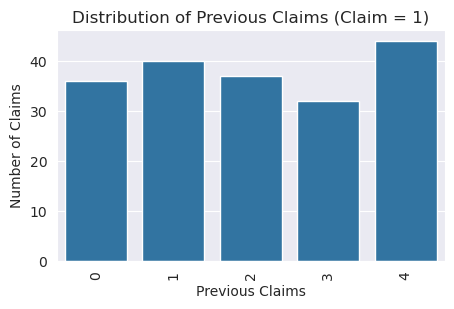

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for claims = 1
claim_data = data[data['Claim_Propensity'] == 1]

# Group data by 'Location' and count the number of claims in each location
location_counts = data['Num_Previous_Claims'].value_counts()

# Create a bar graph
plt.figure(figsize=(5, 3))
sns.countplot(x='Num_Previous_Claims', data=claim_data)
plt.title('Distribution of Previous Claims (Claim = 1)')
plt.xlabel('Previous Claims')
plt.ylabel('Number of Claims')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


## Model Without Sagemaker usage 

In [55]:
# Add a claim_id column for tracking
data['claim_id'] = data.index

# Select features and target variable
features = ['Age', 'Gender', 'Marital_Status', 'Occupation', 'Driving_Experience', 'Location', 
            'Education', 'Vehicle_Type', 'Vehicle_Age', 'Vehicle_Value', 'Engine_Size', 
            'Vehicle_Modifications', 'Num_Previous_Claims', 'Claim_Severity', 'Traffic_Violations', 
            'Accidents', 'Policy_Type', 'Coverage_Limits', 'Deductible', 'Policy_Duration', 
            'Driving_Habits', 'Vehicle_Usage', 'Parking_Location', 'Insurance_History']
target = 'Claim_Propensity'

X = data[features].copy()
y = data[target]

# Add claim_id to the features DataFrame
X['claim_id'] = data['claim_id']

In [62]:
#Missing value Imputation
data['Vehicle_Modifications'] = data['Vehicle_Modifications'].fillna('Not Modified')

In [63]:

X = data[features].copy()
y = data[target]

# Add claim_id to the features DataFrame
X['claim_id'] = data['claim_id']

In [67]:

# Convert categorical features to strings
cat_features = ['Gender', 'Marital_Status', 'Occupation', 'Location', 'Education', 
                'Vehicle_Type', 'Vehicle_Modifications', 'Policy_Type', 'Driving_Habits', 
                'Vehicle_Usage', 'Parking_Location', 'Insurance_History']
X[cat_features] = X[cat_features].astype(str)

# Separate numerical and categorical features
num_features = [col for col in features if col not in cat_features]

# Scale numerical features
scaler = StandardScaler()
X[num_features] = scaler.fit_transform(X[num_features])

# Apply one-hot encoding to categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # Ensure output is dense
encoded_features = encoder.fit_transform(X[cat_features])

# Keep the claim_id for later mapping
X_features_with_id = X.copy()

# Remove claim_id for model training
X_features = X.drop(columns=['claim_id'])

# Concatenate numerical and encoded categorical features
X_encoded = np.concatenate((X_features[num_features].values, encoded_features), axis=1)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [72]:

# Initialize the CatBoost classifier
model = CatBoostClassifier(iterations=200, depth=8, learning_rate=0.05, loss_function='Logloss', 
                           eval_metric='AUC', random_seed=42, l2_leaf_reg=3, border_count=32)

# Train the model
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Create a DataFrame with the original features and predictions
X_test_encoded_df = pd.DataFrame(X_test, columns=np.concatenate([num_features, encoder.get_feature_names_out(cat_features)]))

# Reverse the one-hot encoding
X_test_original_cat = encoder.inverse_transform(X_test_encoded_df[encoder.get_feature_names_out(cat_features)])
X_test_encoded_df[cat_features] = X_test_original_cat

# Retrieve claim_id for the test set by aligning with the indices from the original DataFrame
X_test_indices = np.where(np.isin(X_encoded, X_test, assume_unique=True))[0]
X_test_claim_ids = X_features_with_id.iloc[X_test_indices]['claim_id'].reset_index(drop=True)

# Add predictions and claim_id to the DataFrame
##X_test_encoded_df['claim_id'] = X_test_claim_ids
X_test_encoded_df['y_pred'] = y_pred
X_test_encoded_df['y_pred_proba'] = y_pred_proba


In [73]:

# Display the output DataFrame
print(X_test_encoded_df.head())

        Age  Driving_Experience  Vehicle_Age  Vehicle_Value  Engine_Size  \
0 -0.489196           -1.414252    -0.638959      -0.499194     0.742386   
1 -1.704316           -1.282829    -1.156474       0.290484    -1.380740   
2  0.284062           -0.954269    -0.293949       1.010502     0.742386   
3  0.897340           -1.328904    -0.551693      -0.912260    -0.884512   
4 -1.151989           -0.100014     0.913587      -1.395539     0.034678   

   Num_Previous_Claims  Claim_Severity  Traffic_Violations  Accidents  \
0             0.027561        1.501539           -0.140180  -1.212738   
1             0.716577       -0.346764            0.188110   0.022229   
2            -1.350472       -0.743100           -1.125048  -1.212738   
3            -0.214000        1.430040            0.836193   0.824232   
4            -0.661456        0.662218           -0.304324   0.022229   

   Coverage_Limits  ...    Education  Vehicle_Type  Vehicle_Modifications  \
0        -1.080421  ...  Hi

In [70]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC:", auc)


Accuracy: 0.9076923076923077
Precision: 0.8903225806451613
Recall: 0.9139072847682119
F1-score: 0.9019607843137255
AUC: 0.9770876151328309


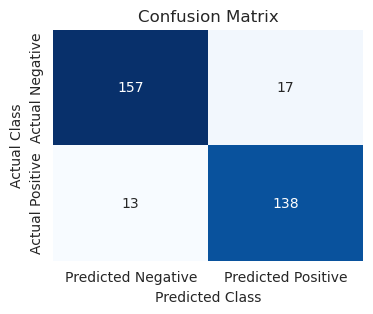

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix")
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

# Display the plot
plt.show()

## Model Build using Sagemaker 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Load the dataset
data = pd.read_csv('data_claim_d2.csv')

# Feature and target columns
features = ['Age', 'Gender', 'Marital_Status', 'Occupation', 'Driving_Experience', 'Location', 
            'Education', 'Vehicle_Type', 'Vehicle_Age', 'Vehicle_Value', 'Engine_Size', 
            'Vehicle_Modifications', 'Num_Previous_Claims', 'Claim_Severity', 'Traffic_Violations', 
            'Accidents', 'Policy_Type', 'Coverage_Limits', 'Deductible', 'Policy_Duration', 
            'Driving_Habits', 'Vehicle_Usage', 'Parking_Location', 'Insurance_History']
target = 'Claim_Propensity'

# Splitting features and target
X = data[features]
y = data[target]

# Encode categorical features
label_encoders = {}
for col in X.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Store encoders for potential inverse_transform or future use

# Standardizing numerical features
scaler = StandardScaler()
X[X.select_dtypes(include=['int64', 'float64']).columns] = scaler.fit_transform(X.select_dtypes(include=['int64', 'float64']))

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handling class imbalance: Compute scale_pos_weight for training data
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
scale_pos_weight = class_weights[1] / class_weights[0]  # If Claim_Propensity=1 is the minority class

# Print scale_pos_weight for reference
print(f'Scale_Pos_Weight: {scale_pos_weight}')

# Now X_train, X_test, y_train, and y_test are ready for modeling.


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/_param_validation.py:11: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 1.22.4)
  from scipy.sparse import csr_matrix, issparse


Scale_Pos_Weight: 4.298013245033113


/tmp/ipykernel_8741/3248145857.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/tmp/ipykernel_8741/3248145857.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/tmp/ipykernel_8741/3248145857.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [26]:
X_train.shape

(800, 24)

In [2]:
X_train = X_train.astype('float32')

y_train = y_train.astype('float32')

# Verify the change
print(y_train.dtypes)

# Verify the change
print(X_train.dtypes)

float32
Age                      float32
Gender                   float32
Marital_Status           float32
Occupation               float32
Driving_Experience       float32
Location                 float32
Education                float32
Vehicle_Type             float32
Vehicle_Age              float32
Vehicle_Value            float32
Engine_Size              float32
Vehicle_Modifications    float32
Num_Previous_Claims      float32
Claim_Severity           float32
Traffic_Violations       float32
Accidents                float32
Policy_Type              float32
Coverage_Limits          float32
Deductible               float32
Policy_Duration          float32
Driving_Habits           float32
Vehicle_Usage            float32
Parking_Location         float32
Insurance_History        float32
dtype: object


In [3]:
type(X_train)

pandas.core.frame.DataFrame

In [4]:
y_train.shape

(800,)

In [5]:
import io # The io module allows for dealing with various types of I/O (text I/O, binary I/O and raw I/O). 
import numpy as np
import sagemaker.amazon.common as smac # sagemaker common libary

# Code below converts the data in numpy array format to RecordIO format
# This is the format required by Sagemaker Linear Learner 


# Convert pandas DataFrames to NumPy arrays
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

# Create an in-memory byte array (buf is a buffer to write to)
buf = io.BytesIO()

# Write the NumPy arrays to the dense tensor format
smac.write_numpy_to_dense_tensor(buf, X_train_np, y_train_np)

# Reset the buffer's position back to zero
buf.seek(0)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


0

In [8]:
import os
import boto3
# Code to upload RecordIO data to S3
 
# Key refers to the name of the file    
key = 'claim_prop_prod_v1'
bucket = 'claim-prop-prod'
prefix = 'data'
# The following code uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://claim-prop-prod/data/train/claim_prop_prod_v1


In [9]:
X_test.shape

(200, 24)

In [10]:
y_test.shape

(200,)

In [55]:
# ##dont run 
# #consolidated
# import io
# import sagemaker.amazon.common as smac

# # Convert pandas DataFrames to NumPy arrays
# X_test_np = X_test.to_numpy()
# y_test_np = y_test.to_numpy()

# # Create an in-memory byte array (buf is a buffer to write to)
# buf = io.BytesIO()

# # Write the NumPy arrays to the dense tensor format
# smac.write_numpy_to_dense_tensor(buf, X_test_np, y_test_np)

# # Reset the buffer's position back to zero
# buf.seek(0)

# # Now you can upload this buffer to S3 using Sagemaker or Boto3 as per your requirement

# # Key refers to the name of the file    
# key = 'claim_prop_prod_v1'

# # The following code uploads the data in record-io format to S3 bucket to be accessed later for training
# boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'test', key)).upload_fileobj(buf)

# # Let's print out the testing data location in s3
# s3_test_data = 's3://{}/{}/test/{}'.format(bucket, prefix, key)
# print('uploaded training data location: {}'.format(s3_test_data))


# # create an output placeholder in S3 bucket to store the linear learner output

# output_location = 's3://{}/{}/output'.format(bucket, prefix)
# print('Training artifacts will be uploaded to: {}'.format(output_location))

# import boto3
# import sagemaker
# from sagemaker.amazon.amazon_estimator import get_image_uri

# # Get the linear learner container for classification
# container = get_image_uri(boto3.Session().region_name, 'linear-learner')


# # Define the estimator for classification
# linear_classifier = sagemaker.estimator.Estimator(container,
#                                                   role, 
#                                                   train_instance_count=1, 
#                                                   train_instance_type='ml.m5.large',  # Changed to a different instance type
#                                                   output_path=output_location,
#                                                   sagemaker_session=sagemaker_session)

# # Set hyperparameters for classification
# linear_classifier.set_hyperparameters(feature_dim=24,
#                                       predictor_type='binary_classifier',  # Changed to binary_classifier for classification
#                                       mini_batch_size=5,
#                                       epochs=5,
#                                       num_models=32,
#                                       loss='logistic')  # Using logistic loss for binary classification
# # Pass in the training data from S3 to train the classification model
# linear_classifier.fit({'train': s3_train_data})



# # Sample test input (replace 'X_test_sample' with actual sample data for testing)
# X_test_sample = X_test_np[0:10]  # You can select a portion of your test data to make a prediction

# # Convert the NumPy array sample to CSV format and make predictions
# predictions = linear_classifier_predictor.predict(X_test_sample)

# # Print out the prediction
# print("Predictions: ", predictions)

# # Cleanup: Delete the endpoint when you're done
# # linear_classifier_predictor.delete_endpoint()



In [ ]:
############

In [11]:
import io
import sagemaker.amazon.common as smac

# Convert pandas DataFrames to NumPy arrays
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

# Create an in-memory byte array (buf is a buffer to write to)
buf = io.BytesIO()

# Write the NumPy arrays to the dense tensor format
smac.write_numpy_to_dense_tensor(buf, X_test_np, y_test_np)

# Reset the buffer's position back to zero
buf.seek(0)

# Now you can upload this buffer to S3 using Sagemaker or Boto3 as per your requirement


0

In [12]:
# Key refers to the name of the file    
key = 'claim_prop_prod_v1'

# The following code uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'test', key)).upload_fileobj(buf)

# Let's print out the testing data location in s3
s3_test_data = 's3://{}/{}/test/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_test_data))

uploaded training data location: s3://claim-prop-prod/data/test/claim_prop_prod_v1


In [13]:
# create an output placeholder in S3 bucket to store the linear learner output

output_location = 's3://{}/{}/output'.format(bucket, 'model')
print('Training artifacts will be uploaded to: {}'.format(output_location))

Training artifacts will be uploaded to: s3://claim-prop-prod/model/output


In [14]:
import boto3
import sagemaker
from sagemaker.amazon.amazon_estimator import get_image_uri

# Get the linear learner container for classification
container = get_image_uri(boto3.Session().region_name, 'linear-learner')

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [15]:
container

'669576153137.dkr.ecr.eu-north-1.amazonaws.com/linear-learner:1'

In [19]:
role = sagemaker.get_execution_role()
sagemaker_session = sagemaker.Session()

In [20]:

# Define the estimator for classification
linear_classifier = sagemaker.estimator.Estimator(container,
                                                  role, 
                                                  train_instance_count=1, 
                                                  train_instance_type='ml.m5.large',  # Changed to a different instance type
                                                  output_path=output_location,
                                                  sagemaker_session=sagemaker_session)

# Set hyperparameters for classification
linear_classifier.set_hyperparameters(feature_dim=24,
                                      predictor_type='binary_classifier',  # Changed to binary_classifier for classification
                                      mini_batch_size=5,
                                      epochs=5,
                                      num_models=32,
                                      loss='logistic')  # Using logistic loss for binary classification


train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [21]:
# Pass in the training data from S3 to train the classification model
linear_classifier.fit({'train': s3_train_data})

INFO:sagemaker:Creating training-job with name: linear-learner-2024-09-19-10-54-01-966


2024-09-19 10:54:02 Starting - Starting the training job...
2024-09-19 10:54:25 Starting - Preparing the instances for training...
2024-09-19 10:54:48 Downloading - Downloading input data...
2024-09-19 10:55:23 Downloading - Downloading the training image.........
2024-09-19 10:56:50 Training - Training image download completed. Training in progress.Docker entrypoint called with argument(s): train
Running default environment configuration script
[09/19/2024 10:56:54 INFO 139704748508992] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss':

[2024-09-19 10:57:06.805] [tensorio] [info] epoch_stats={"data_pipeline": "/opt/ml/input/data/train", "epoch": 6, "duration": 5628, "num_examples": 160, "num_bytes": 112000}
#metrics {"StartTime": 1726743426.805598, "EndTime": 1726743426.8058636, "Dimensions": {"Algorithm": "Linear Learner", "Host": "algo-1", "Operation": "training", "epoch": 1, "model": 0}, "Metrics": {"train_binary_classification_cross_entropy_objective": {"sum": 0.40134790886193517, "count": 1, "min": 0.40134790886193517, "max": 0.40134790886193517}}}
#metrics {"StartTime": 1726743426.8059347, "EndTime": 1726743426.8059483, "Dimensions": {"Algorithm": "Linear Learner", "Host": "algo-1", "Operation": "training", "epoch": 1, "model": 1}, "Metrics": {"train_binary_classification_cross_entropy_objective": {"sum": 0.4005764202028513, "count": 1, "min": 0.4005764202028513, "max": 0.4005764202028513}}}
#metrics {"StartTime": 1726743426.8060014, "EndTime": 1726743426.8060133, "Dimensions": {"Algorithm": "Linear Learner", "H

[2024-09-19 10:57:14.159] [tensorio] [info] epoch_stats={"data_pipeline": "/opt/ml/input/data/train", "epoch": 10, "duration": 3649, "num_examples": 160, "num_bytes": 112000}
#metrics {"StartTime": 1726743434.159998, "EndTime": 1726743434.160119, "Dimensions": {"Algorithm": "Linear Learner", "Host": "algo-1", "Operation": "training", "epoch": 3, "model": 0}, "Metrics": {"train_binary_classification_cross_entropy_objective": {"sum": 0.37820781126618386, "count": 1, "min": 0.37820781126618386, "max": 0.37820781126618386}}}
#metrics {"StartTime": 1726743434.1602397, "EndTime": 1726743434.1602592, "Dimensions": {"Algorithm": "Linear Learner", "Host": "algo-1", "Operation": "training", "epoch": 3, "model": 1}, "Metrics": {"train_binary_classification_cross_entropy_objective": {"sum": 0.37782835129648445, "count": 1, "min": 0.37782835129648445, "max": 0.37782835129648445}}}
#metrics {"StartTime": 1726743434.1603343, "EndTime": 1726743434.1603885, "Dimensions": {"Algorithm": "Linear Learner",


2024-09-19 10:57:39 Uploading - Uploading generated training model
2024-09-19 10:57:39 Completed - Training job completed
Training seconds: 171
Billable seconds: 171


In [22]:
# Deploy the model after training
linear_classifier_predictor = linear_classifier.deploy(
    initial_instance_count=1,
    instance_type='ml.m5.large'
)

# Now we define how the input will be serialized before sending it to the endpoint and how the output will be deserialized
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer

# Set the serializer and deserializer
linear_classifier_predictor.serializer = CSVSerializer()  # Serializes input data into CSV format for the model
linear_classifier_predictor.deserializer = JSONDeserializer()  # Deserializes output from JSON

INFO:sagemaker:Creating model with name: linear-learner-2024-09-19-11-02-41-442
INFO:sagemaker:Creating endpoint-config with name linear-learner-2024-09-19-11-02-41-442
INFO:sagemaker:Creating endpoint with name linear-learner-2024-09-19-11-02-41-442


-------!

In [58]:


# Sample test input (replace 'X_test_sample' with actual sample data for testing)
X_test_sample = X_test_np[0:10]  # You can select a portion of your test data to make a prediction

# Convert the NumPy array sample to CSV format and make predictions
predictions = linear_classifier_predictor.predict(X_test_sample)

# Print out the prediction
print("Predictions: ", predictions)

# Cleanup: Delete the endpoint when you're done
# linear_classifier_predictor.delete_endpoint()


Predictions:  {'predictions': [{'score': 0.1697852462530136, 'predicted_label': 0}, {'score': 0.3657095730304718, 'predicted_label': 0}, {'score': 0.3799239993095398, 'predicted_label': 0}, {'score': 0.2614441215991974, 'predicted_label': 0}, {'score': 0.5143691897392273, 'predicted_label': 1}, {'score': 0.049808427691459656, 'predicted_label': 0}, {'score': 0.2558673918247223, 'predicted_label': 0}, {'score': 0.0340065099298954, 'predicted_label': 0}, {'score': 0.09319023042917252, 'predicted_label': 0}, {'score': 0.11408821493387222, 'predicted_label': 0}]}


In [23]:
# Cleanup: Delete the endpoint when you're done
linear_classifier_predictor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: linear-learner-2024-09-19-11-02-41-442
INFO:sagemaker:Deleting endpoint with name: linear-learner-2024-09-19-11-02-41-442


In [5]:
import boto3
import sagemaker
import boto3 
from sagemaker import Session

In [6]:
role = sagemaker.get_execution_role()

In [24]:
# from sagemaker import linear_classifier
# from sagemaker.model import Model

# # Replace with your S3 model artifact path
# model_artifact_path = 's3://sagemaker-eu-north-1-686583312671/claim_prop_prod_v1/output/linear-learner-2024-09-17-08-57-03-107/output/model.tar.gz'

# # # Define the model
# linear_classifier = linear_classifier(role=role,
#                                   instance_count=1,
#                                   instance_type='ml.m5.large',
#                                   model_uri=model_artifact_path)

# INSTEAD
from sagemaker import LinearLearner
output_location = 's3://sagemaker-eu-north-1-686583312671/claim_prop_prod_v1/output'
linear_classifier = LinearLearner(
    role=role,
    instance_count=1,
    instance_type='ml.m5.large',
    predictor_type='binary_classifier',
    output_path=output_location,
    epochs=5,
    mini_batch_size=5
)


In [13]:
# # Deploy the model
# linear_classifier_predictor_v2 = linear_classifier.deploy(
#     initial_instance_count=1,
#     instance_type='ml.m5.large'
# )

ValueError: Estimator is not associated with a training job

In [18]:
import sagemaker
from sagemaker.model import Model
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer

# S3 path to the pre-trained model
model_artifact_path = 's3://sagemaker-eu-north-1-686583312671/claim_prop_prod_v1/output/linear-learner-2024-09-17-08-57-03-107/output/model.tar.gz'

# Create a SageMaker session
sagemaker_session = sagemaker.Session()

# Create a Model object using the pre-trained model's S3 artifacts
model = Model(
    model_data=model_artifact_path,
    role=role,
    sagemaker_session=sagemaker_session
)

# Redeploy the model
linear_classifier_predictor = model.deploy(
    initial_instance_count=1,
    instance_type='ml.m5.large',
    endpoint_name='linear-classifier-endpoint-v2'  # Specify a new endpoint name
)

# Set the serializer and deserializer
linear_classifier_predictor.serializer = CSVSerializer()  # Serialize input data to CSV
linear_classifier_predictor.deserializer = JSONDeserializer()  # Deserialize output from JSON

print("Model redeployed successfully!")


TypeError: expected string or bytes-like object

In [16]:
import sagemaker
from sagemaker.model import Model
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer

# S3 path to the pre-trained model
model_artifact_path = 's3://sagemaker-eu-north-1-686583312671/claim_prop_prod_v1/output/linear-learner-2024-09-17-08-57-03-107/output/model.tar.gz'


# Define the container image URI for the Linear Learner algorithm
image_uri = sagemaker.image_uris.retrieve(
    region=sagemaker_session.boto_session.region_name,
    framework='linear-learner'
)


# Create a SageMaker session
sagemaker_session = sagemaker.Session()

# Create a Model object using the pre-trained model's S3 artifacts and the image URI
model = Model(
    model_data=model_artifact_path,
    role=role,
    image_uri=image_uri,  # Specifying the image URI for the algorithm
    sagemaker_session=sagemaker_session
)

# Redeploy the model
linear_classifier_predictor = model.deploy(
    initial_instance_count=1,
    instance_type='ml.m5.large',
    endpoint_name='linear-classifier-endpoint-v3'  # Specify a new endpoint name
)



-------!

In [20]:
# Delete endpoint
import boto3

client = boto3.client('sagemaker')
client.delete_endpoint_config(EndpointConfigName='linear-classifier-endpoint-v3')

ClientError: An error occurred (ValidationException) when calling the DeleteEndpointConfig operation: Could not find endpoint configuration "linear-classifier-endpoint-v3".

In [17]:
print(linear_classifier_predictor)

None
